In [14]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [ ]:
from src.config import settings

In [8]:
df = pd.read_parquet(os.path.join(settings.data_dir, "arxiver/data/train.parquet"))
print(df.shape, df.columns)
## Sample 10k
df = df.sample(10000)

(63357, 7) Index(['id', 'title', 'abstract', 'authors', 'published_date', 'link',
       'markdown'],
      dtype='object')


In [9]:
df.head()

,id,title,abstract,authors,published_date,link,markdown
46076,2308.01786,Unique properties of the optical activity in n...,We present general properties of the optical a...,"Koki Shinada, Robert Peters",2023-08-03T14:35:36Z,http://arxiv.org/abs/2308.01786v2,# Unique properties of the optical activity in...
30915,2310.13510,Beyond power density: unexpected scaling laws ...,Blue energy represents a large reservoir of re...,"Timothee Derkenne, Annie Colin, Corentin Tregouet",2023-10-20T13:54:58Z,http://arxiv.org/abs/2310.13510v1,Beyond power density: unexpected scaling laws ...
51840,2301.03760,Over-The-Air Adversarial Attacks on Deep Learn...,"Empowered by deep neural networks (DNNs), Wi-F...","Fei Xiao, Yong Huang, Yingying Zuo, Wei Kuang,...",2023-01-10T02:37:23Z,http://arxiv.org/abs/2301.03760v1,# Over-The-Air Adversarial Attacks on Deep Lea...
39419,2302.05542,Dynamics of intermediate mass black holes in g...,We recently introduced a new method for simula...,"Pierfrancesco Di Cintio, Mario Pasquato, Luca ...",2023-02-10T23:09:34Z,http://arxiv.org/abs/2302.05542v2,# Dynamics of intermediate mass black holes in...
60173,2309.01369,Exploring Limits of Diffusion-Synthetic Traini...,The advance of generative models for images ha...,"Ryota Yoshihashi, Yuya Otsuka, Kenji Doi, Tomo...",2023-09-04T05:34:19Z,http://arxiv.org/abs/2309.01369v2,Attention as Annotation: Generating Images and...


In [6]:
## Load Tokenizer
from src.utils.tokenizer_utils import *

gpt_4o_mini_tokenizer = init_tiktoken_tokenizer("gpt-4o-mini")
bge_m3_tokenizer = init_hf_tokenizer("baai/bge-m3")

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

# Abstract Lengths

In [10]:
## Abstract Lengths
abstract_texts = df.abstract.values.tolist()

100%|██████████| 10000/10000 [00:01<00:00, 7508.50it/s]


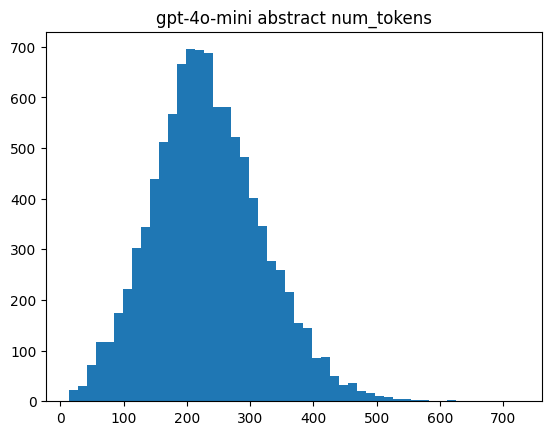

In [12]:
gpt_4o_mini_lens = [tiktoken_length(gpt_4o_mini_tokenizer, x) for x in tqdm(abstract_texts)]
plt.clf()
plt.hist(gpt_4o_mini_lens, bins = 50)
plt.title("gpt-4o-mini abstract num_tokens")
plt.show()

100%|██████████| 10000/10000 [00:04<00:00, 2064.81it/s]


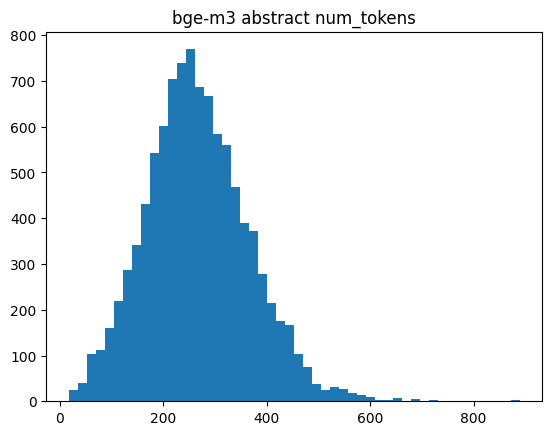

In [13]:
bge_m3_lens = [hf_length(bge_m3_tokenizer, x) for x in tqdm(abstract_texts)]
plt.clf()
plt.hist(bge_m3_lens, bins = 50)
plt.title("bge-m3 abstract num_tokens")
plt.show()

# Sections (+subsections)